In [1]:
pip install import-ipynb


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [68]:
import import_ipynb
import AnalisisCartas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import json

from pymongo import MongoClient

In [70]:
warnings.filterwarnings("ignore", category=FutureWarning)

# En este punto leeremos los datos desde mongoDB

In [73]:
analisisC = AnalisisCartas.CardAnalisis()
dfCartas = analisisC.get_dataframe()

In [12]:
#La información nos muestra cada carta como una columna
print(dfCartas.info())
#Usaremos la funcion transpose de nuestro dataframe para usar los datos como columnas y las cartas como filas
#dfCartas = dfCartas.transpose()
#print(dfCartas.info())

<class 'pandas.core.frame.DataFrame'>
Index: 19519 entries, 668533e011d9b1395ddacfc3 to 668533e211d9b1395ddb1fb5
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   colorIdentity          19519 non-null  object
 1   colors                 19519 non-null  object
 2   convertedManaCost      19519 non-null  object
 3   edhrecRank             19304 non-null  object
 4   foreignData            19519 non-null  object
 5   layout                 19519 non-null  object
 6   legalities             19519 non-null  object
 7   manaCost               18705 non-null  object
 8   mtgoFoilId             12622 non-null  object
 9   mtgoId                 14889 non-null  object
 10  name                   19519 non-null  object
 11  printings              19519 non-null  object
 12  purchaseUrls           17898 non-null  object
 13  rulings                19519 non-null  object
 14  scryfallOracleId       19519 non-

In [95]:
#Visualizacion del dataframe
dfCartas.columns

Index(['colorIdentity', 'colors', 'convertedManaCost', 'edhrecRank',
       'foreignData', 'layout', 'legalities', 'manaCost', 'mtgoFoilId',
       'mtgoId', 'name', 'printings', 'purchaseUrls', 'rulings',
       'scryfallOracleId', 'subtypes', 'supertypes', 'text', 'type', 'types',
       'uuid', 'mtgArenaId', 'power', 'toughness', 'faceConvertedManaCost',
       'names', 'side', 'isReserved', 'leadershipSkills', 'loyalty',
       'colorIndicator', 'hasNoDeckLimit'],
      dtype='object')

In [48]:
dfCartas

,colorIdentity,colors,convertedManaCost,edhrecRank,foreignData,layout,legalities,manaCost,mtgoFoilId,mtgoId,...,power,toughness,faceConvertedManaCost,names,side,isReserved,leadershipSkills,loyalty,colorIndicator,hasNoDeckLimit
668533e011d9b1395ddacfc3,[B],[B],2.0,13417,"[{'language': 'German', 'name': 'Verlust der H...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{X}{1}{B},9992,9991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668533e011d9b1395ddacfc4,[R],[R],3.0,7558,"[{'language': 'German', 'name': 'Abkehr von de...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{2}{R},61409,61408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668533e011d9b1395ddacfc5,[W],[],0.0,12416,"[{'language': 'German', 'name': 'Aufgegebener ...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",NaN,16468,16467,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668533e011d9b1395ddacfc6,[],[],3.0,6972,"[{'flavorText': 'Was einst ruhte, ruht nicht m...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{3},64841,64840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668533e011d9b1395ddacfc7,[B],[B],4.0,9906,[{'flavorText': '死は彼の人間性を奪ったが、包丁使いの腕までは奪わなかった。...,normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{3}{B},NaN,NaN,...,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668533e211d9b1395ddb1fb1,"[B, U]",[U],2.0,18731,"[{'language': 'German', 'name': 'Zuranischer V...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{1}{U},NaN,NaN,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668533e211d9b1395ddb1fb2,[],[],0.0,1760,[],normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{0},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668533e211d9b1395ddb1fb3,[U],[U],3.0,9265,"[{'language': 'German', 'name': 'Zuranischer Z...",normal,"{'commander': 'Legal', 'duel': 'Legal', 'legac...",{2}{U},NaN,24481,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668533e211d9b1395ddb1fb4,[R],[R],1.0,6287,"[{'language': 'German', 'name': 'Zurgo Glocken...",normal,"{'commander': 'Legal', 'duel': 'Restricted', '...",{R},56051,56050,...,2,2,NaN,NaN,NaN,NaN,"{'brawl': False, 'commander': True, 'oathbreak...",NaN,NaN,NaN


## El dataframe ya se encuentra listo para poder realizar visualizaciones de los datos

Grafica de las catas por el coste de mana convertido

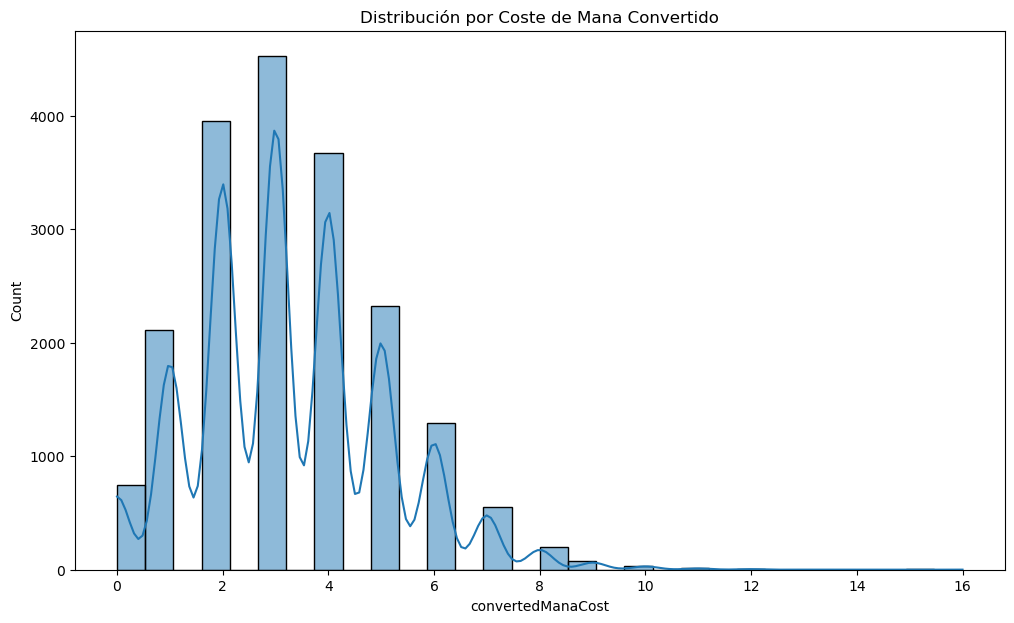

In [10]:
plt.figure(figsize=(12,7))
sns.histplot(dfCartas['convertedManaCost'], bins=30, kde=True)
plt.title('Distribución por Coste de Mana Convertido')
plt.show()

# En el siguiente gráfico relizaremos un conteo de las cartas tanto por su identidad de color y color para asi ver la diferencia

In [32]:
#Agrupamos la columna de indentidad de color
agrupacionIdentidadColores = dfCartas['colorIdentity'].apply(lambda x: ''.join(sorted(x)))
conteoIdentidadColores = agrupacionIdentidadColores.value_counts()
#Agrupamos la columna colores
agrupacionColores = dfCartas['colors'].apply(lambda x: ''.join(sorted(x)))
conteoColores = agrupacionColores.value_counts()

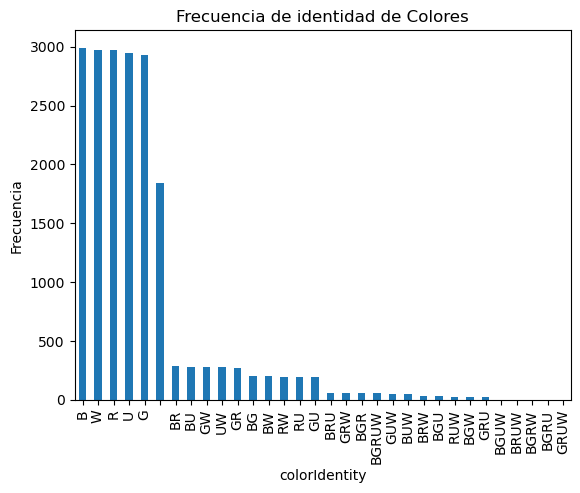

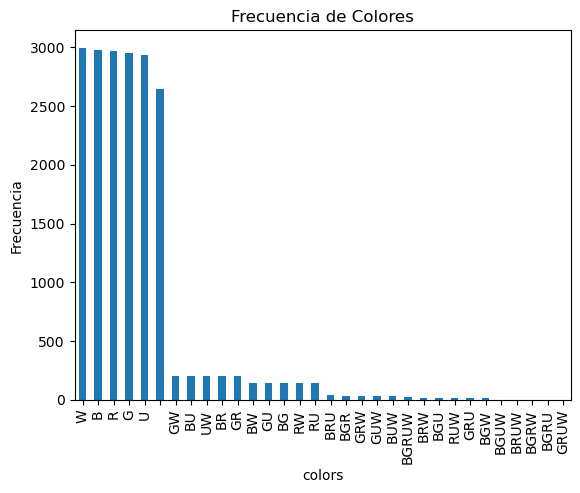

In [36]:
#Mostraremos ambos graficos para poder ver las diferencias
conteoIdentidadColores.plot(kind='bar')
plt.xlabel('colorIdentity')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de identidad de Colores')
plt.show()

conteoColores.plot(kind='bar')
plt.xlabel('colors')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Colores')
plt.show()

# Para el último gráfico realizaremos uno de tipo "pie"

Lo crearemos conteando la cantidad de cartas legales de cada formato para asi ver el porcentage de cartas que tiene cada formato

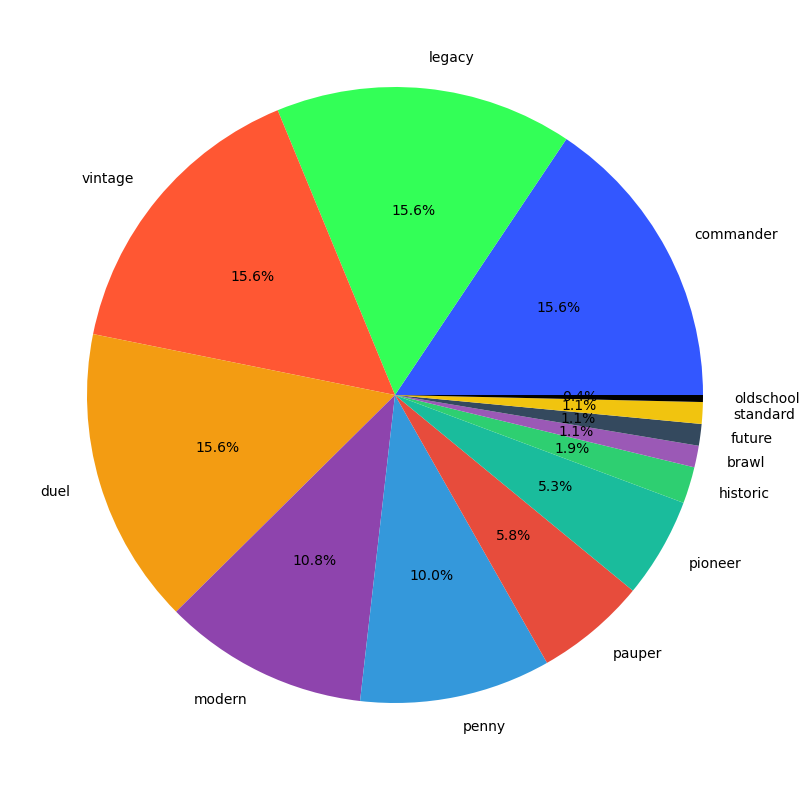

In [179]:

# Desglosar las listas de valores en la columna "legalities"
legalities_exploded = dfCartas['legalities'].explode()
# Contar la frecuencia de cada valor
legalities_count = legalities_exploded.value_counts()

colores = [
    "#3357FF",  # Rojo anaranjado
    "#33FF57",  # Verde brillante
    "#FF5733",  # Azul vivo
    "#F39C12",  # Naranja
    "#8E44AD",  # Morado
    "#3498DB",  # Azul claro
    "#E74C3C",  # Rojo
    "#1ABC9C",  # Turquesa
    "#2ECf71",  # Verde esmeralda
    "#9B59B6",  # Morado medio
    "#34495E",  # Azul oscuro
    "#F1C40F",  # Amarillo
    "#000000"   # Naranja medio
]

# Mostrar el resultado
plt.figure(figsize=(15, 10))
plt.pie(legalities_count.values, colors = colores, autopct='%1.1f%%', labels=legalities_count.index)

plt.show()